# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from api_keys import weather_api_key 
import requests
from scipy.stats import linregress
import json
import os
import random
random.seed(17)

## Generate Cities List

In [2]:
with open("current_city_list_min.json", encoding='utf-8') as jsonfile:
    city_json = json.load(jsonfile)
nums = random.sample(range(len(city_json)), k=600)
city_list=[]
for i in nums:
    city_list.append(city_json[i]['name'])
city_list[0]

'Goias'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
unit = 'imperial'
base_url = f'http://api.openweathermap.org/data/2.5/weather?units={unit}&appid={weather_api_key}&q='
city_name = []
lat=[]
lng=[]
maxtemp=[]
hum=[]
cloudiness=[]
ws=[]
country=[]
date=[]
for city in city_list:
    try:
        data = requests.get(base_url+city).json()
        city_name.append(data['name'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        maxtemp.append(data['main']['temp_max'])
        hum.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        ws.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
    except KeyError:
        pass
df = pd.DataFrame({'City':city_name,'Lat':lat,'Lng':lng,'Max Temp':maxtemp,'Humidity':hum,'Cloudiness':cloudiness,'Wind Speed':ws,'Country':country,'Date':date})
df.to_csv('../my_output_data/city_info.csv',index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.read_csv('../my_output_data/city_info.csv')
city_df.shape

(600, 9)

In [6]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Goiás,-15.58,-49.64,104.09,9,0,8.23,BR,1601826036
1,Luckenwalde,52.08,13.17,64.00,52,18,5.01,DE,1601826036
2,Mount Isa,-20.73,139.50,68.00,45,0,10.63,AU,1601826037
3,Sandown,50.65,-1.16,54.00,94,100,5.99,GB,1601826037
4,Hamada,34.88,132.08,71.01,36,83,10.58,JP,1601826037


In [7]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02
mean,28.110183,16.387800,69.329767,63.211667,48.311667,7.245250,1.601826e+09
std,22.687553,71.394064,13.374990,22.355084,36.108969,4.599939,6.413240e+01
min,-38.100000,-123.500000,30.880000,4.000000,0.000000,0.090000,1.601826e+09
25%,14.850000,-41.007500,59.000000,50.000000,13.750000,3.830000,1.601826e+09
50%,34.880000,13.175000,69.800000,65.500000,43.000000,6.210000,1.601826e+09
75%,45.585000,75.870000,79.120000,81.000000,78.000000,9.715000,1.601826e+09
max,62.460000,168.320000,106.930000,100.000000,100.000000,25.280000,1.601826e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# NO cities that have humidity > 100%.
city_df.loc[city_df['Humidity']>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

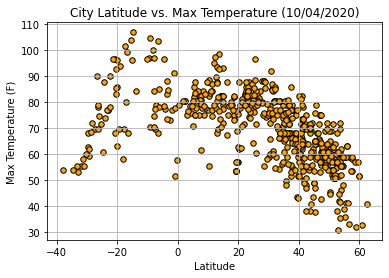

In [26]:
city_df.plot.scatter('Lat','Max Temp',color='orange',edgecolor='black',s=30)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (10/04/2020)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

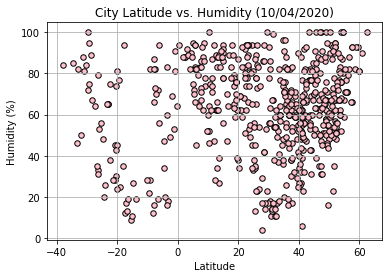

In [27]:
city_df.plot.scatter('Lat','Humidity',color='pink',edgecolor='black',s=30)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/04/2020)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

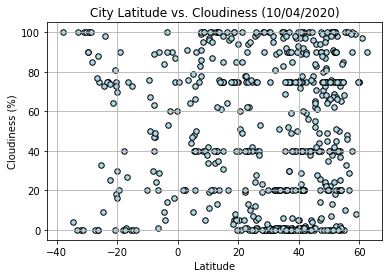

In [30]:
city_df.plot.scatter('Lat','Cloudiness',color='lightblue',edgecolor='black',s=30)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/04/2020)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

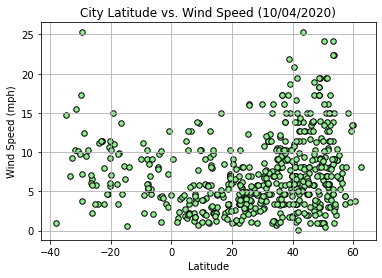

In [31]:
city_df.plot.scatter('Lat','Wind Speed',color='lightgreen',edgecolor='black',s=30)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/04/2020)')
plt.grid()
plt.show()

## Linear Regression

In [56]:
north_city_df = city_df.loc[city_df['Lat']>=0]
sorth_city_df = city_df.loc[city_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6945870458452664


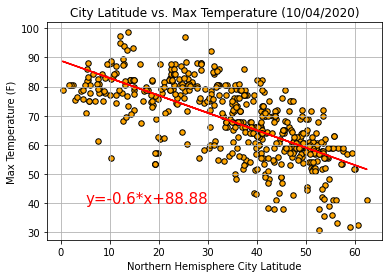

In [47]:
north_city_df.plot.scatter('Lat','Max Temp',color='orange',edgecolor='black',s=30)
plt.xlabel('Northern Hemisphere City Latitude')
plt.ylabel('Max Temperature (F)')
x_values=north_city_df['Lat']
y_values=north_city_df['Max Temp']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(5,40),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Max Temperature (10/04/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.399117027560155


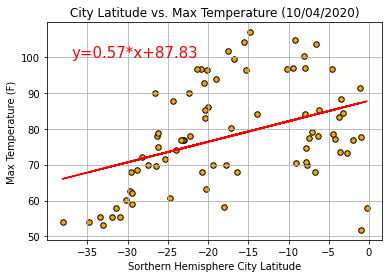

In [57]:

sorth_city_df.plot.scatter('Lat','Max Temp',color='orange',edgecolor='black',s=30)
plt.xlabel('Sorthern Hemisphere City Latitude')
plt.ylabel('Max Temperature (F)')
x_values=sorth_city_df['Lat']
y_values=sorth_city_df['Max Temp']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-37,100),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Max Temperature (10/04/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.07813874023259204


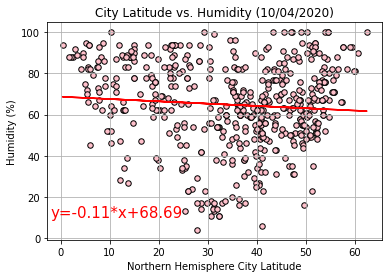

In [63]:
north_city_df.plot.scatter('Lat','Humidity',color='pink',edgecolor='black',s=30)
plt.xlabel('Northern Hemisphere City Latitude')
plt.ylabel('Humidity (%)')
x_values=north_city_df['Lat']
y_values=north_city_df['Humidity']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-2,10),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Humidity (10/04/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.18155423724816033


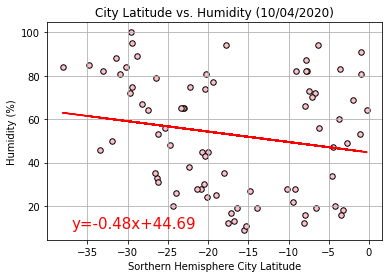

In [66]:
sorth_city_df.plot.scatter('Lat','Humidity',color='pink',edgecolor='black',s=30)
plt.xlabel('Sorthern Hemisphere City Latitude')
plt.ylabel('Humidity (%)')
x_values=sorth_city_df['Lat']
y_values=sorth_city_df['Humidity']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-37,10),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Humidity (10/04/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.007429610393377125


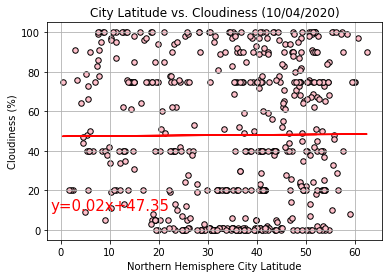

In [67]:
north_city_df.plot.scatter('Lat','Cloudiness',color='lightblue',edgecolor='black',s=30)
plt.xlabel('Northern Hemisphere City Latitude')
plt.ylabel('Cloudiness (%)')
x_values=north_city_df['Lat']
y_values=north_city_df['Cloudiness']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-2,10),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Cloudiness (10/04/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.08732286000646142


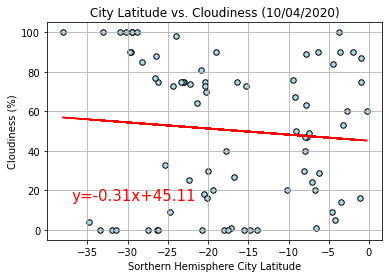

In [71]:
sorth_city_df.plot.scatter('Lat','Cloudiness',color='lightblue',edgecolor='black',s=30)
plt.xlabel('Sorthern Hemisphere City Latitude')
plt.ylabel('Cloudiness (%)')
x_values=sorth_city_df['Lat']
y_values=sorth_city_df['Cloudiness']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-37,15),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Cloudiness (10/04/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.32178387509346856


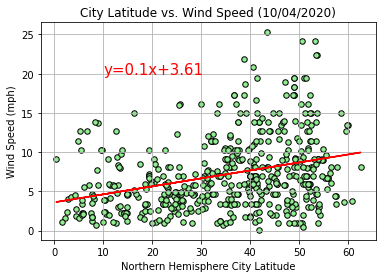

In [73]:
north_city_df.plot.scatter('Lat','Wind Speed',color='lightgreen',edgecolor='black',s=30)
plt.xlabel('Northern Hemisphere City Latitude')
plt.ylabel('Wind Speed (mph)')
x_values=north_city_df['Lat']
y_values=north_city_df['Wind Speed']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(10,20),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Wind Speed (10/04/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.29842889708253356


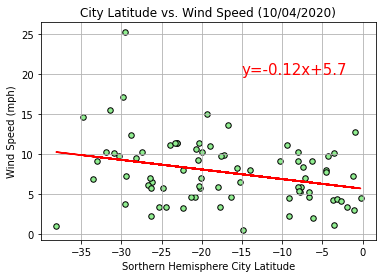

In [75]:
sorth_city_df.plot.scatter('Lat','Wind Speed',color='lightgreen',edgecolor='black',s=30)
plt.xlabel('Sorthern Hemisphere City Latitude')
plt.ylabel('Wind Speed (mph)')
x_values=sorth_city_df['Lat']
y_values=sorth_city_df['Wind Speed']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-15,20),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Wind Speed (10/04/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()